In [2]:
import pickle as pkl
from pathlib import Path
import IPython.display as ipd

import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import widgets
import shutil
from tqdm.notebook import tqdm
from datetime import timedelta

In [3]:
path_to_final = Path("../Data/TrainingDataset/")

The file name contains all the information regarding the contents of the file.  

For example:  
`49---Kitchen---Chopping---1.pkl`  

Participant ID: 49, Context: Kitchen, Activity: Chopping, TrialNo: 1

In [14]:
# get a list of all the files 
filelist = [*path_to_final.iterdir()]
filelist_df = pd.DataFrame(filelist, columns=["final_path"])
filelist_df[["PID", "Context", "Activity", "TrialNo"]] = filelist_df["final_path"].apply(lambda x: x.name.rstrip(".pkl").split("---")).to_list()

In [15]:
filelist_df

,final_path,PID,Context,Activity,TrialNo
0,../Data/TrainingDataset/49---Kitchen---Choppin...,49,Kitchen,Chopping,1
1,../Data/TrainingDataset/201---Kitchen---Gratin...,201,Kitchen,Grating,3
2,../Data/TrainingDataset/7---Bathroom---Toilet_...,7,Bathroom,Toilet_flushing,1
3,../Data/TrainingDataset/7---Kitchen---Pouring_...,7,Kitchen,Pouring_pitcher,2
4,../Data/TrainingDataset/17---Bathroom---Hair_d...,17,Bathroom,Hair_dryer_in_use,2
...,...,...,...,...,...
1628,../Data/TrainingDataset/203---Bathroom---Washi...,203,Bathroom,Washing_hands,2
1629,../Data/TrainingDataset/41---Kitchen---Pouring...,41,Kitchen,Pouring_pitcher,1
1630,../Data/TrainingDataset/17---Kitchen---Wiping_...,17,Kitchen,Wiping_with_rag,1
1631,../Data/TrainingDataset/37---Workshop---Drill ...,37,Workshop,Drill in use,1


## Contents of each file

In [30]:
eg_file = filelist[10]
print(eg_file.name)
with open(eg_file, "rb") as f:
    fdata = pkl.load(f)

58---Workshop---Sanding---2.pkl


In [31]:
# keys of the file
fdata.keys()

dict_keys(['Audio', 'IMU'])

[27  5 27 ...  9 13 -5]


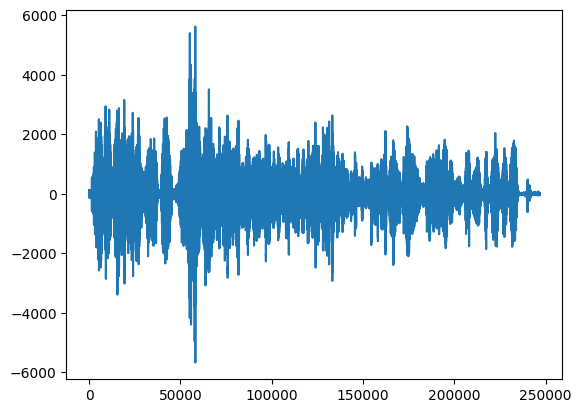

In [36]:
# Audio contains a 1D array of audio data, sampled at 16kHz
print(fdata["Audio"])
plt.plot(fdata["Audio"])
plt.show()

(799, 9)


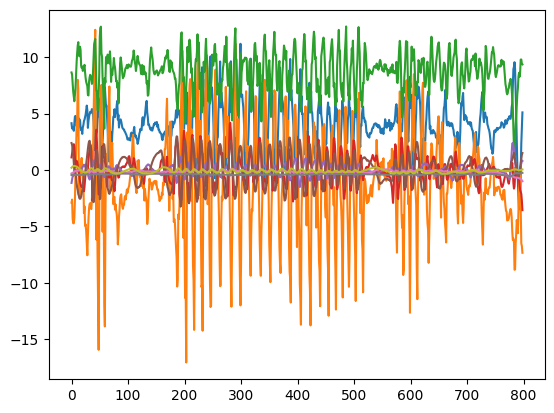

In [40]:
# IMU is a 2D array of (N_Samples, 9 axes) Sampled at ~50Hz
print(fdata["IMU"].shape) 
# the 9 axes are acc_x, y, z; gyr_x, y, z; rotvec_x, y, z
plt.plot(fdata["IMU"])
plt.show()